In [1]:
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt

In [2]:
#----------------------------------------------------------------------------#
def kvals(a,N):
    kmax = 2*np.pi/a
    k=np.multiply(np.random.rand(3,N),kmax)
    return k
#----------------------------------------------------------------------------#
def disp_solver(an, m, C, k):
    ar =an[1:,:].copy()
    arnorm = np.zeros(len(ar))
    for n in range(len(ar)):
        arnorm[n] = np.linalg.norm(ar[n])
        ar[n] = np.divide(ar[n],arnorm[n])

    for n in range(len(ar)):
        # x-direction, sum(delta_u):
        delta_uxx = ar[:,0]*ar[:,0]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uxy = ar[:,0]*ar[:,1]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uxz = ar[:,0]*ar[:,2]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        # y-direction, sum(delta_u):
        delta_uyx = ar[:,1]*ar[:,0]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uyy = ar[:,1]*ar[:,1]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uyz = ar[:,1]*ar[:,2]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        # z-direction, sum(delta_u):
        delta_uzx = ar[:,2]*ar[:,0]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uzy = ar[:,2]*ar[:,1]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)
        delta_uzz = ar[:,2]*ar[:,2]*np.exp((0+1j)*np.sum(an[1:,:]*npm.repmat(k,len(ar),1),axis=1)-1)

    M = -np.real([[np.sum(delta_uxx),np.sum(delta_uxy),np.sum(delta_uxz)],[np.sum(delta_uyx),np.sum(delta_uyy),np.sum(delta_uyz)],[np.sum(delta_uzx),np.sum(delta_uzy),np.sum(delta_uzz)]])
    # eigs(M) = w^2 * m/C
    #Berechnung von w laut hergeleiteter Formel
    wp = np.real(np.sqrt(np.linalg.eigvals(M)*C/m))
    return wp
#----------------------------------------------------------------------------#

/var/folders/lk/sd3wjcp93kv55b2ccz3cc9f40000gp/T/ipykernel_97446/2452050164.py:31: RuntimeWarning: invalid value encountered in sqrt
  wp = np.real(np.sqrt(np.linalg.eigvals(M)*C/m))


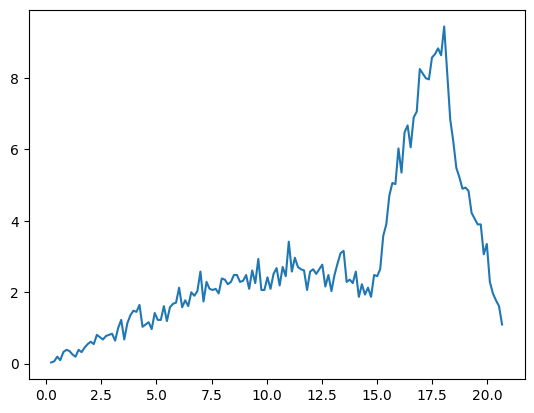

In [3]:
a = 4.49 #anstrom
C = 200 #N/m
m = 0.344*10**-24 #kg

kvaln = 10000

# FCC:
an = np.multiply([[0,0,0],[1,1,0],[1,0,1],[0,1,1],[-1,-1,0],[-1,0,-1],[0,-1,-1],[1,-1,0],[1,0,-1],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1]],a/2)

k = kvals(a,kvaln)

w = np.zeros((3,len(k[0])))
frames = len(k[0])
#printProgressBar(0, frames, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i in range(len(k[0])):
    k_aktuell = [k[0][i], k[1][i], k[2][i]]
    w[:,i] = disp_solver(an, m, C, k_aktuell)
    #printProgressBar(i+1, frames, prefix = 'Progress:', suffix = 'Complete', length = 50)
#----------------------------------------------------------------------------#

#uses the values calculated by base

nbins=150; #number of output values for the plot

#w are the results from the base script, which determines the dispersion
#relation for the fcc crystal
wn=w[np.logical_not(np.isnan(w))]/np.sqrt(2); #factor to have values like those in debye
#there is an error in the dispersionrelation calculation in the function
#that we took from an old student project

wmin = np.min(wn[:]); #determines the smallest value
wmax = np.max(wn[:]); #determines the greatest value

wneu = np.linspace(wmin,wmax,nbins); #generates a vector from wmin to wmax with 150 elements

#DOS=sum(delta(w-w(i)))
#print(wneu)
binned,hist = np.histogram(wn,bins=wneu)
#print(len(binned))
#bins the elements in wn(:) in wneu equally spaced containers and returns
#the number of elements in each container as a row vector

dos = np.multiply(binned,4/(wmax-wmin)*nbins/(a*10**(-10))**3/kvaln/10**6)

#plt.hist(wn,bins=100)
#plt.show()
#* 10^6......m^3 => cm^3
#* kvaln.....number of considered k-vectors
#* a.........scaling to volume [angström]
#* (wmax-wmin)/nbins...dx (width of containers)
#* 4.........number of atoms in the fcc crystal
#            8 corner atoms *1/8 + 6 area atoms *1/2 = 4

plt.plot(np.divide(wneu[1:],10**12),np.divide(dos,10**9)); #plots the dos
#xlabel('\omega / 10^{12} s^{-1}')
plt.show()